In [148]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
from pyresample import geometry
import random

random.seed(42)

In [141]:
landsat_path = '../landsat_files/landsat_files/'
goes_path = '../landsat_files/'
goes039 = np.load(goes_path + 'OR_ABI-L1b-RadC-M6C07_G17_s20212401846176_e20212401848561_c20212401849003.npy')
goes103 = np.load(goes_path + 'OR_ABI-L1b-RadC-M6C14_G17_s20212401846176_e20212401848549_c20212401848593.npy')

In [142]:
pc = ccrs.PlateCarree()
pc_params = pc.proj4_params
pc_extents = [-124.25, 32.25, -114.25, 42.25]
shape = [500, 500]
target_area = geometry.AreaDefinition.from_extent('CA', pc_params, shape, pc_extents)

latlon1A = [40.49, -121.45]
latlon2A = [40.650000000000006, -121.17]
coords1A = target_area.get_array_coordinates_from_lonlat(latlon1A[1], latlon1A[0])
coords1A = (round(coords1A[0]), round(coords1A[1]))
coords2A = target_area.get_array_coordinates_from_lonlat(latlon2A[1], latlon2A[0])
coords2A = (round(coords2A[0]), round(coords2A[1]))
lonsA = [coords1A[0], coords2A[0]]
latsA = [coords2A[1], coords1A[1]]

latlon1B = [39.91, -120.97]
latlon2B = [40.13, -120.49000000000001]
coords1B = target_area.get_array_coordinates_from_lonlat(latlon1B[1], latlon1B[0])
coords1B = (round(coords1B[0]), round(coords1B[1]))
coords2B = target_area.get_array_coordinates_from_lonlat(latlon2B[1], latlon2B[0])
coords2B = (round(coords2B[0]), round(coords2B[1]))
lonsB = [coords1B[0], coords2B[0]]
latsB = [coords2B[1], coords1B[1]]

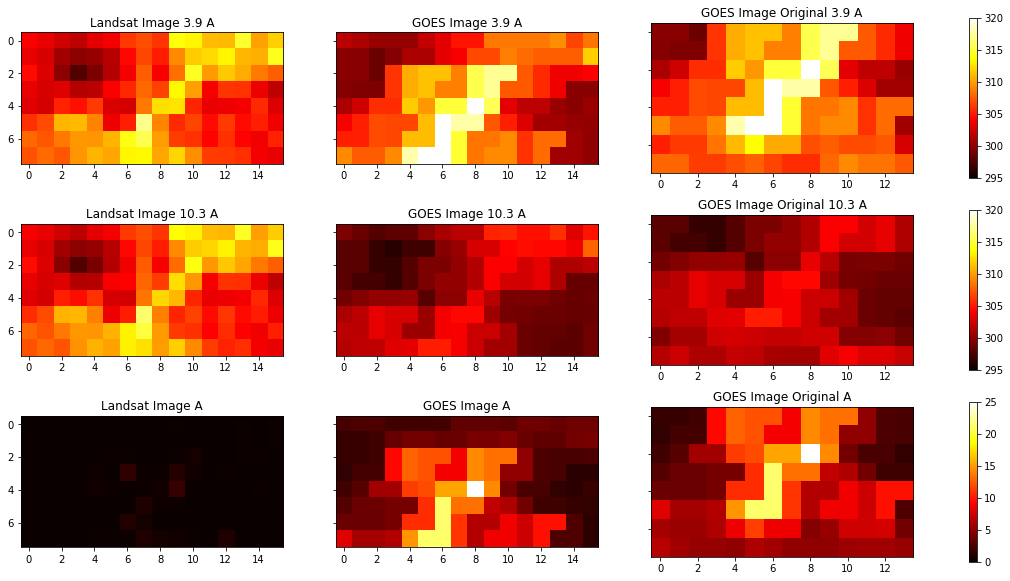

In [162]:
f, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(20, 10), sharey=True)
max_temp = 320
min_temp = 295

landsat_img_039_A = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT3.9_gridAcent0.02deg.npy'))
goes_img_039_A = shiftPixels(landsat_img_039_A, goes039, [latsA[0], latsA[1]], [lonsA[0], lonsA[1]])
goes_img_original_039_A = goes039[latsA[0]:latsA[1], lonsA[0]:lonsA[1]]

landsat_map = ax1[0].imshow(landsat_img_039_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[0].set_title('Landsat Image 3.9 A')
ax1[1].imshow(goes_img_039_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[1].set_title('GOES Image 3.9 A')
ax1[2].imshow(goes_img_original_039_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[2].set_title('GOES Image Original 3.9 A')
plt.colorbar(landsat_map, ax = ax1)

landsat_img_103_A = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT10.3_gridAcent0.02deg.npy'))
goes_img_103_A = shiftPixels(landsat_img_103_A, goes103, [latsA[0], latsA[1]], [lonsA[0], lonsA[1]])
goes_img_original_103_A = goes103[latsA[0]:latsA[1], lonsA[0]:lonsA[1]]

landsat_map = ax2[0].imshow(landsat_img_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[0].set_title('Landsat Image 10.3 A')
ax2[1].imshow(goes_img_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[1].set_title('GOES Image 10.3 A')
ax2[2].imshow(goes_img_original_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[2].set_title('GOES Image Original 10.3 A')
plt.colorbar(landsat_map, ax = ax2)

max_temp = 25
min_temp = 0
landsat_map = ax3[0].imshow(landsat_img_039_A-landsat_img_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax3[0].set_title('Landsat Image A')
ax3[1].imshow(goes_img_039_A-goes_img_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax3[1].set_title('GOES Image A')
ax3[2].imshow(goes_img_original_039_A-goes_img_original_103_A, vmin = min_temp, vmax = max_temp, cmap='hot')
ax3[2].set_title('GOES Image Original A')
plt.colorbar(landsat_map, ax = ax3)

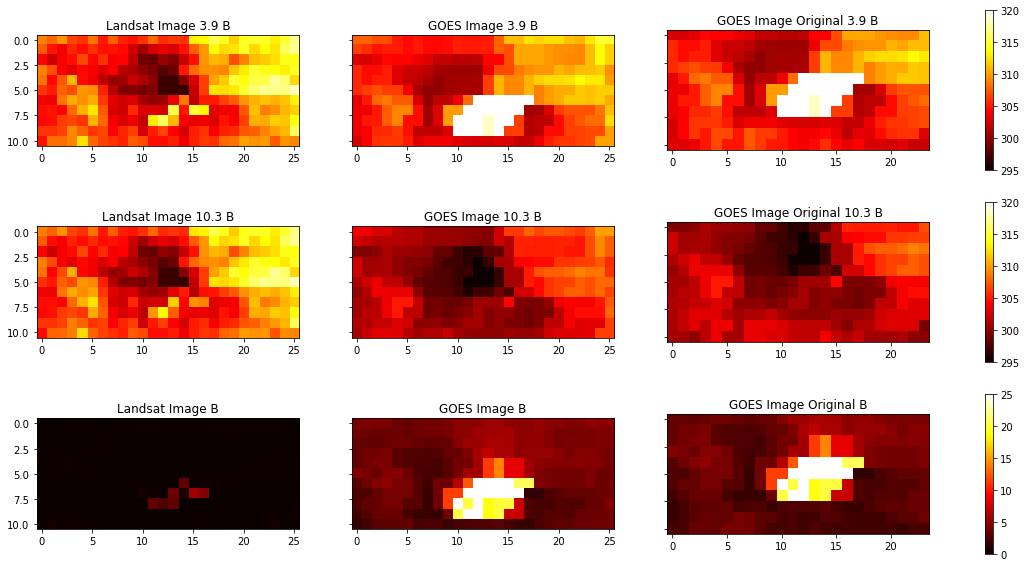

In [166]:
f, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(20, 10), sharey=True)
max_temp = 320
min_temp = 295

landsat_img_039_B = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT3.9_gridBcent0.02deg.npy'))
goes_img_039_B = shiftPixels(landsat_img_039_B, goes039, [latsB[0], latsB[1]], [lonsB[0], lonsB[1]])
goes_img_original_039_B = goes039[latsB[0]:latsB[1], lonsB[0]:lonsB[1]]

landsat_map = ax1[0].imshow(landsat_img_039_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[0].set_title('Landsat Image 3.9 B')
ax1[1].imshow(goes_img_039_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[1].set_title('GOES Image 3.9 B')
ax1[2].imshow(goes_img_original_039_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax1[2].set_title('GOES Image Original 3.9 B')
plt.colorbar(landsat_map, ax = ax1)

landsat_img_103_B = np.flipud(np.load(landsat_path + 'LC08_L2SP_044032_20210828_20210901_02_T1_goesLS_BT10.3_gridBcent0.02deg.npy'))
goes_img_103_B = shiftPixels(landsat_img_103_B, goes103, [latsB[0], latsB[1]], [lonsB[0], lonsB[1]])
goes_img_original_103_B = goes103[latsB[0]:latsB[1], lonsB[0]:lonsB[1]]

landsat_map = ax2[0].imshow(landsat_img_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[0].set_title('Landsat Image 10.3 B')
ax2[1].imshow(goes_img_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[1].set_title('GOES Image 10.3 B')
ax2[2].imshow(goes_img_original_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax2[2].set_title('GOES Image Original 10.3 B')
plt.colorbar(landsat_map, ax = ax2)

max_temp = 25
min_temp = 0
landsat_map = ax3[0].imshow(landsat_img_039_B-landsat_img_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax3[0].set_title('Landsat Image B')
ax3[1].imshow(goes_img_039_B-goes_img_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax3[1].set_title('GOES Image B')
ax3[2].imshow(goes_img_original_039_B-goes_img_original_103_B, vmin = min_temp, vmax = max_temp, cmap='hot')
ax3[2].set_title('GOES Image Original B')
plt.colorbar(landsat_map, ax = ax3)

In [144]:
def shiftPixels(refimg, newimg_full, lats, lons):
    newimg = newimg_full[lats[0]:lats[1], lons[0]:lons[1]]
    x_add = 0
    y_add = 0
    nx = 0
    ny = 0
    while refimg.shape != newimg.shape:
        if refimg.shape[0] > newimg.shape[0]:
            x_add += 1
            nx += 1
        elif refimg.shape[0] < newimg.shape[0]:
            x_add -= 1
            nx += 1
        if refimg.shape[1] > newimg.shape[1]:
            y_add += 1
            ny += 1
        elif refimg.shape[1] < newimg.shape[1]:
            y_add -= 1
            ny += 1
        newimg = newimg_full[lats[0]:lats[1] + x_add, lons[0]:lons[1] + y_add]
    lats[1] += x_add
    lons[1] += y_add
    
    min_x = -2
    min_y = 0

    return newimg_full[lats[0]+min_x:lats[1]+min_x, lons[0]+min_y:lons[1]+min_y]